In [ ]:
import numpy  as np
import pandas as pd
from   tqdm   import tqdm
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from IPython.display import clear_output
from scipy.signal import argrelextrema
import ast

import time
from datetime import datetime,date

In [ ]:
!git clone https://github.com/Deepinvest-team/deepinvest_open_environment.git

Cloning into 'deepinvest_open_environment'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [ ]:
import sys
sys.path.append('/content/deepinvest_open_environment')
from deepinvest_open_environment.Observer import Observers

# Import Trainset

Import Testset

In [ ]:
#asset01-train
!gdown --id 1mXz42aGzAQcPCaeDInxsojHkPLcvymOA
#asset02-train
!gdown --id 1JJCS_SicAqo-fmIVfLpMUhk5KLmpKWFt
#asset03-train
!gdown --id 1W1FcZSOwkJEhmo4Oi5XQqXkWbILrj7H2
#asset04-train
!gdown --id 1aWPsgj6IcpiOdwws7XOz6M0zIou1zm7D
#asset05-train
!gdown --id 17H6To6RVq9KXt54hgMEN7tWX5fd87tuz
#asset01-test
!gdown --id 1lM419SCZhFCGej_onEikgU5M3s9B9mId
#asset02-test
!gdown --id 1jLL_N80Ciit-GQ5NAUm-bGwFl23ZhWVS
#asset03-test
!gdown --id 1YL70mrBQSoqFcHBniAcc9ZOGYudrH0xr
#asset04-test
!gdown --id 1DnqGz1GjlHWwFDRPksab_ig-o1C67ZDm
#asset05-test
!gdown --id 1WCNAXTeiSMRgoOGFSk0UfBtIjXUbNDx_

Downloading...
From: https://drive.google.com/uc?id=1mXz42aGzAQcPCaeDInxsojHkPLcvymOA
To: /content/Asset01_train.csv
100% 195k/195k [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JJCS_SicAqo-fmIVfLpMUhk5KLmpKWFt
To: /content/Asset02_train.csv
100% 191k/191k [00:00<00:00, 54.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W1FcZSOwkJEhmo4Oi5XQqXkWbILrj7H2
To: /content/Asset03_train.csv
100% 190k/190k [00:00<00:00, 60.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aWPsgj6IcpiOdwws7XOz6M0zIou1zm7D
To: /content/Asset04_train.csv
100% 199k/199k [00:00<00:00, 43.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=17H6To6RVq9KXt54hgMEN7tWX5fd87tuz
To: /content/Asset05_train.csv
100% 195k/195k [00:00<00:00, 62.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lM419SCZhFCGej_onEikgU5M3s9B9mId
To: /content/Asset01_test.csv
100% 21.6k/21.6k [00:00<00:00, 20.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jLL_N80Cii

## import lib

In [ ]:
import matplotlib.pyplot as plt

สร้าง environment
 * Observers(windowsize,train=True)
 * Observers จะเป็นสภาพแวดล้อมที่ใช้ในการทดสอบโมเดล โดย parameter จะประกอบไปด้วย window size ซึ่งเป็นขนาดของข้อมูลย้อนหลังที่ต้องการเห็น และ train จะเป็นค่า True หรือ False ซึ่งเป็นค่าที่ใช้เปลี่ยนข้อมูลของ environment โดย train ระบบจะดึงข้อมูลชุด train มาให้ ส่วน test ระบบจะดึงข้อมูลส่วน test มาให้


In [ ]:
#observers = Observers(30,train=False)
observers = Observers(30,train=True)

**getCodeAsset**
  * getCodeAsset บอกรหัสของ Asset ที่ใช้ในการเปิดคำสั่งซื้อขาย

**getDataset**
  * getDataset เรียกข้อมูลย้อนหลังทั้งหมด

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web

def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema

In [ ]:
total = len(observers.getDataset()['Asset01']['close'])
print(total)

2111


In [ ]:
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 4.9 MB/s 


In [ ]:
import talib
# CDC ActionZone V.2
def CDCActionZoneV2(close, fast, slow):
  AP = talib.EMA(close,2)
  fast = talib.EMA(AP,fast)
  slow = talib.EMA(AP,slow)

  signal = fast - slow

  return signal, fast, slow

In [ ]:
def addFeature(asset):
  feature = {}
  ema12 = calculate_ema(observers.getDataset()[asset]['close'], 12)
  ema26 = calculate_ema(observers.getDataset()[asset]['close'], 26)
  cdc, f, s = CDCActionZoneV2(observers.getDataset()[asset]['close'], 12, 26)
  macd, macdsignal, macdhist = talib.MACD(observers.getDataset()[asset]['close'], fastperiod=12, slowperiod=26, signalperiod=9)
  adx = talib.ADX(observers.getDataset()[asset]['high'], observers.getDataset()[asset]['low'], observers.getDataset()[asset]['close'], timeperiod=14) # unstable period.
  roc = talib.ROC(observers.getDataset()[asset]['close'], timeperiod=5)
  rsi = talib.RSI(observers.getDataset()[asset]['close'], timeperiod=14)
  stoch, slowd = talib.STOCH(observers.getDataset()[asset]['high'], observers.getDataset()[asset]['low'], observers.getDataset()[asset]['close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

  for i in range(total-len(ema12)):
    ema12.insert(0,0)
  for i in range(total-len(ema26)):
    ema26.insert(0,0)
  for i in range(total-len(cdc)):
    cdc.insert(0,0)
  for i in range(total-len(macd)):
    macd.insert(0,0)
  for i in range(total-len(adx)):
    adx.insert(0,0)
  for i in range(total-len(roc)):
    roc.insert(0,0)
  for i in range(total-len(rsi)):
    rsi.insert(0,0)
  for i in range(total-len(stoch)):
    stoch.insert(0,0)

  feature = {
      'EMA12' : ema12,
      'EMA26' : ema26,
      'CDC' : cdc,
      'MACD' : macd,
      'ADX' : adx,
      'ROC' : roc,
      'RSI' : rsi,
      'STOCH' : stoch


  }

  observers.getDataset()[asset]['EMA12'] = feature['EMA12']
  observers.getDataset()[asset]['EMA26'] = feature['EMA26']
  observers.getDataset()[asset]['CDC'] = feature['CDC']
  observers.getDataset()[asset]['MACD'] = feature['MACD']
  observers.getDataset()[asset]['ADX'] = feature['ADX']
  observers.getDataset()[asset]['ROC'] = feature['ROC']
  observers.getDataset()[asset]['RSI'] = feature['RSI']
  observers.getDataset()[asset]['STOCH'] = feature['STOCH']
  return feature

In [ ]:
FA01 = addFeature('Asset01')
FA02 = addFeature('Asset02')
FA03 = addFeature('Asset03')
FA04 = addFeature('Asset04')
FA05 = addFeature('Asset05')

In [ ]:
df = pd.DataFrame({'Day': []})
df2 = pd.DataFrame({'Day': []})
df3 = pd.DataFrame({'Day': []})
df4 = pd.DataFrame({'Day': []})
df5 = pd.DataFrame({'Day': []})

In [ ]:
df['Day'] = observers.getDataset()['Asset01'].index
df2['Day'] = observers.getDataset()['Asset02'].index
df3['Day'] = observers.getDataset()['Asset03'].index
df4['Day'] = observers.getDataset()['Asset04'].index
df5['Day'] = observers.getDataset()['Asset05'].index

In [ ]:
df

,Day
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
2106,2018-12-21
2107,2018-12-24
2108,2018-12-26
2109,2018-12-27


In [ ]:
observers.getDataset()['Asset01'].reset_index(drop=True)

,open,high,low,close,volume,EMA12,EMA26,CDC,MACD,ADX,ROC,RSI,STOCH
0,13.854970,13.979149,13.788238,13.937369,45505,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,13.936982,14.006905,13.875086,13.890270,46686,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,13.891043,13.959323,13.813577,13.926440,45435,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,13.926730,13.970735,13.829341,13.833886,44298,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,13.833693,13.952069,13.794524,13.934854,34425,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,11.069063,11.096432,10.982311,10.992853,93835,10.993945,10.996392,-0.003483,-0.002447,11.335020,0.541339,49.568812,60.527210
2107,10.993820,11.062099,10.986470,11.041113,64548,11.001202,10.999705,-0.000163,0.001497,11.315980,0.610729,53.817202,57.446659
2108,11.039178,11.039468,10.969352,10.978830,41184,10.997760,10.998158,-0.000320,-0.000399,10.904662,-0.070423,48.176532,32.609183
2109,10.980377,11.077283,10.978056,11.053492,99672,11.006334,11.002257,0.002611,0.004077,11.234929,0.467651,54.352972,40.412307


In [ ]:
def addFeat(df, asset):
  df['Close'] = observers.getDataset()[asset]['close'].reset_index(drop=True)
  df['CDC'] = observers.getDataset()[asset]['CDC'].reset_index(drop=True)
  df['MACD'] = observers.getDataset()[asset]['MACD'].reset_index(drop=True)
  df['ADX'] = observers.getDataset()[asset]['ADX'].reset_index(drop=True)
  df['ROC'] = observers.getDataset()[asset]['ROC'].reset_index(drop=True)
  df['RSI'] = observers.getDataset()[asset]['RSI'].reset_index(drop=True)
  df['STOCH'] = observers.getDataset()[asset]['STOCH'].reset_index(drop=True)
  return df

In [ ]:
acc1 = addFeat(df, 'Asset01')
acc2 = addFeat(df2, 'Asset02')
acc3 = addFeat(df3, 'Asset03')
acc4 = addFeat(df4, 'Asset04')
acc5 = addFeat(df5, 'Asset05')

In [ ]:
# REAL ACTION PROFIT
def getCDCRealPosition(newDf):
  dayLong = []
  Long = []
  dayCount = []
  day = 0
  buy = 0
  sell = 0
  for i in range(len(newDf['Day'])):
    if newDf['CDC'][i] > 0:
      if buy == 0:
        dayLong.append(newDf['Day'][i])
        Long.append(1)
        buy = newDf['Close'][i]
      day += 1
    else:
      if buy != 0:
        sell = newDf['Close'][i]
        if buy > sell:
          dayLong.pop()
          Long.pop()
          day = 0
        else:
          dayCount.append(day)
          day = 0
      sell = 0
      buy = 0

  if day != 0:
    dayCount.append(day)

  return pd.DataFrame({'Day': dayLong, 'Long':Long}), dayCount

In [ ]:
cdcReal01, Day01 = getCDCRealPosition(acc1)
cdcReal02, Day02 = getCDCRealPosition(acc2)
cdcReal03, Day03 = getCDCRealPosition(acc3)
cdcReal04, Day04 = getCDCRealPosition(acc4)
cdcReal05, Day05 = getCDCRealPosition(acc5)

In [ ]:
len(Day01)

13

In [ ]:
cdcReal01

,Day,Long
0,2010-07-07,1
1,2010-09-15,1
2,2011-01-20,1
3,2012-08-21,1
4,2012-11-27,1
5,2013-09-16,1
6,2013-11-29,1
7,2014-02-14,1
8,2016-01-28,1
9,2016-03-07,1


In [ ]:
result01 = pd.merge(acc1, cdcReal01, how="outer", on=['Day'])
result01 = result01.fillna(0)
result01 = result01.drop({'Day','Close'}, axis=1)

result02 = pd.merge(acc2, cdcReal02, how="outer", on=['Day'])
result02 = result02.fillna(0)
result02 = result02.drop({'Day','Close'}, axis=1)

result03 = pd.merge(acc3, cdcReal03, how="outer", on=['Day'])
result03 = result03.fillna(0)
result03 = result03.drop({'Day','Close'}, axis=1)

result04 = pd.merge(acc4, cdcReal04, how="outer", on=['Day'])
result04 = result04.fillna(0)
result04 = result04.drop({'Day','Close'}, axis=1)

result05 = pd.merge(acc5, cdcReal05, how="outer", on=['Day'])
result05 = result05.fillna(0)
result05 = result05.drop({'Day','Close'}, axis=1)

In [ ]:
result01

,CDC,MACD,ADX,ROC,RSI,STOCH,Long
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
2106,-0.003483,-0.002447,11.335020,0.541339,49.568812,60.527210,0.0
2107,-0.000163,0.001497,11.315980,0.610729,53.817202,57.446659,0.0
2108,-0.000320,-0.000399,10.904662,-0.070423,48.176532,32.609183,0.0
2109,0.002611,0.004077,11.234929,0.467651,54.352972,40.412307,1.0


In [ ]:
len(result01['Long'])

2111

In [ ]:
print(sum(Day01))
print(sum(Day02))
print(sum(Day03))
print(sum(Day04))
print(sum(Day05))

615
628
710
1130
777


In [ ]:
def longCount(data, day):
  point = 0
  dayCount = 0
  for i in range(len(data)):
    if data['Long'][i] == 1:
      dayCount = day[point]
      point += 1
    if dayCount > 0:
      data['Long'][i] = 1
      dayCount -= 1
  return data

In [ ]:
result01 = longCount(result01, Day01)
result02 = longCount(result02, Day02)
result03 = longCount(result03, Day03)
result04 = longCount(result04, Day04)
result05 = longCount(result05, Day05)

In [ ]:
result01['Long'].value_counts()

0.0    1496
1.0     615
Name: Long, dtype: int64

In [ ]:
# Processing
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from google.colab import drive
from joblib import dump, load

# Multi-layer Perceptron Classifier
def MLPClassification(train,target,cols):
  idx = int(len(train)*0.90)
  x_train, x_test = train[:idx], train[idx:]
  y_train, y_test = target[:idx], target[idx:]

  scaler = MinMaxScaler()
  train_scale = scaler.fit_transform(x_train)
  test_scale = scaler.fit_transform(x_test)

  mlp = MLPClassifier(hidden_layer_sizes=(10), activation = 'relu', solver = 'adam',max_iter= 10000, verbose = True)
  mlp = mlp.fit(x_train, y_train)
  predicted = mlp.predict(x_test)

  return accuracy_score(y_test,predicted)

# Processer Function
def processingMedthod(df,cols):
  train_data = df
  train = train_data.drop(cols,axis=1).values
  target = train_data[cols].values
  accuracy = MLPClassification(train,target,cols)

  return accuracy

In [ ]:
acc = []
acc.append(processingMedthod(result01, 'Long'))
acc.append(processingMedthod(result02, 'Long'))
acc.append(processingMedthod(result03, 'Long'))
acc.append(processingMedthod(result04, 'Long'))
acc.append(processingMedthod(result05, 'Long'))

Iteration 1, loss = 3.09086307
Iteration 2, loss = 2.49674348
Iteration 3, loss = 1.95294598
Iteration 4, loss = 1.50374812
Iteration 5, loss = 1.23232232
Iteration 6, loss = 1.11876745
Iteration 7, loss = 1.05122916
Iteration 8, loss = 0.98290957
Iteration 9, loss = 0.92791026
Iteration 10, loss = 0.87761496
Iteration 11, loss = 0.83495860
Iteration 12, loss = 0.79599728
Iteration 13, loss = 0.76146291
Iteration 14, loss = 0.73275230
Iteration 15, loss = 0.70780464
Iteration 16, loss = 0.68449200
Iteration 17, loss = 0.66618111
Iteration 18, loss = 0.64988080
Iteration 19, loss = 0.63611516
Iteration 20, loss = 0.62515864
Iteration 21, loss = 0.61485619
Iteration 22, loss = 0.60627826
Iteration 23, loss = 0.59904103
Iteration 24, loss = 0.59294637
Iteration 25, loss = 0.58749892
Iteration 26, loss = 0.58325081
Iteration 27, loss = 0.57949944
Iteration 28, loss = 0.57635106
Iteration 29, loss = 0.57317741
Iteration 30, loss = 0.57091071
Iteration 31, loss = 0.56847478
Iteration 32, los

In [ ]:
for i in range(len(acc)):
  print('Asset0'+format(i)+' Accuracy :'+format(acc[i]))

Asset00 Accuracy :0.8349056603773585
Asset01 Accuracy :0.75
Asset02 Accuracy :0.8443396226415094
Asset03 Accuracy :0.9198113207547169
Asset04 Accuracy :0.9858490566037735


In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.3 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 43.9 MB/s 
     |████████████████████████████████| 1.7 MB 47.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.5 MB 189 kB/s 
     |████████████████████████████████| 114 kB 47.0 MB/s 
     |████████████████████████████████| 167 kB 54.8 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 6.8 MB 51.1 MB/s 
     |████████████████████████████████| 274 kB 50.4 MB/s 
     |████████████████████████████████| 1.3 MB 58.6 MB/s 
     |████████████████████████████████| 261 kB 68.4 MB/s 
     |████████████████████████████████| 10.9 MB 49.9 MB/s 
     |████████████████████████████████| 3.1 MB 42.8 MB/s 
     |█████████████████

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
clf5 = setup(result05, target = 'Long')

,Description,Value
0,session_id,5848
1,Target,Long
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(2111, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
ast5 = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9147,0.9677,0.9127,0.8622,0.8862,0.8180,0.8197,0.570
rf,Random Forest Classifier,0.9133,0.9689,0.9332,0.8457,0.8870,0.8170,0.8200,0.676
gbc,Gradient Boosting Classifier,0.9100,0.9677,0.9220,0.8460,0.8818,0.8093,0.8120,0.234
lightgbm,Light Gradient Boosting Machine,0.9073,0.9692,0.9091,0.8488,0.8776,0.8031,0.8047,0.090
ada,Ada Boost Classifier,0.9012,0.9645,0.9054,0.8377,0.8699,0.7904,0.7924,0.144
qda,Quadratic Discriminant Analysis,0.8829,0.9520,0.8367,0.8422,0.8381,0.7464,0.7480,0.018
dt,Decision Tree Classifier,0.8788,0.8687,0.8312,0.8359,0.8335,0.7382,0.7383,0.028
lr,Logistic Regression,0.8774,0.9543,0.8255,0.8372,0.8303,0.7345,0.7357,0.096
ridge,Ridge Classifier,0.8734,0.0000,0.8089,0.8384,0.8224,0.7242,0.7255,0.030
lda,Linear Discriminant Analysis,0.8713,0.9521,0.8107,0.8321,0.8204,0.7203,0.7214,0.020


In [ ]:
et_ast5_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8919,0.9709,0.9074,0.8167,0.8596,0.7721,0.7750
1,0.9189,0.9717,0.9259,0.8621,0.8929,0.8278,0.8291
2,0.9459,0.9742,0.9444,0.9107,0.9273,0.8843,0.8847
3,0.8851,0.9537,0.9259,0.7937,0.8547,0.7607,0.7668
4,0.9527,0.9905,0.9630,0.9123,0.9369,0.8991,0.9000
5,0.9189,0.9753,0.9259,0.8621,0.8929,0.8278,0.8291
6,0.8784,0.9566,0.8889,0.8000,0.8421,0.7436,0.7464
7,0.9048,0.9621,0.8519,0.8846,0.8679,0.7935,0.7938
8,0.9116,0.9694,0.8704,0.8868,0.8785,0.8090,0.8091
9,0.8980,0.9669,0.9057,0.8276,0.8649,0.7832,0.7852


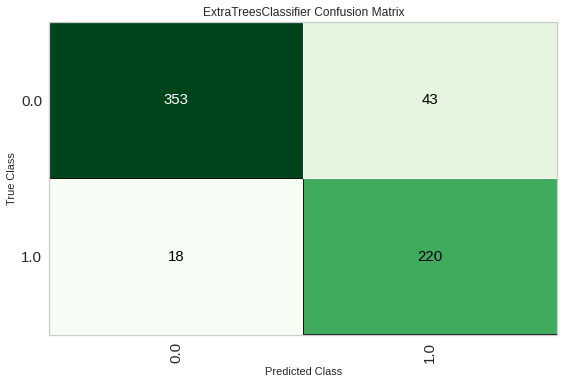

In [ ]:
plot_model(et_ast5_model, 'confusion_matrix')

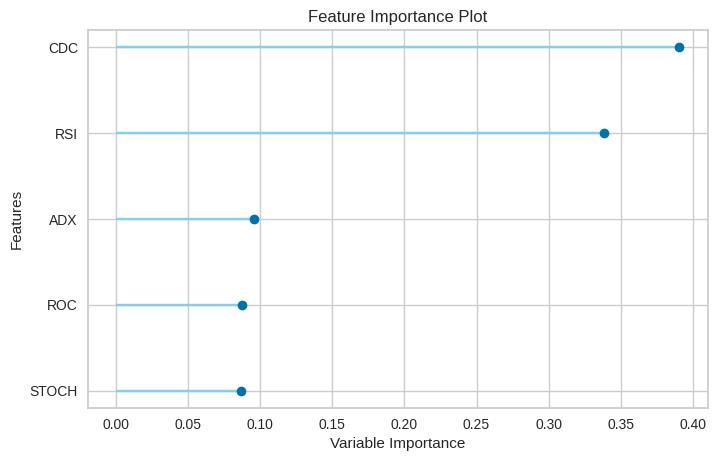

In [ ]:
plot_model(et_ast5_model, plot = 'feature')

In [ ]:
predictions = predict_model(et_ast5_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9038,0.9659,0.9244,0.8365,0.8782,0.799,0.8018


In [ ]:
finalize_model(et_ast5_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5848, verbose=0,
                     warm_start=False)

In [ ]:
save_model(et_ast5_model, 'et_ast5_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Long',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [ ]:
from sklearn.utils import shuffle
ast1 = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8809,0.9534,0.7936,0.8022,0.7975,0.7131,0.7135,0.874
gbc,Gradient Boosting Classifier,0.8775,0.9557,0.7776,0.8015,0.7890,0.7027,0.7032,0.262
et,Extra Trees Classifier,0.8768,0.9526,0.7661,0.8073,0.7860,0.6995,0.7002,0.544
lightgbm,Light Gradient Boosting Machine,0.8754,0.9520,0.7891,0.7889,0.7889,0.7006,0.7007,0.092
lda,Linear Discriminant Analysis,0.8653,0.9369,0.6951,0.8215,0.7521,0.6607,0.6657,0.018
ridge,Ridge Classifier,0.8626,0.0000,0.6722,0.8307,0.7420,0.6499,0.6574,0.026
ada,Ada Boost Classifier,0.8619,0.9433,0.7752,0.7633,0.7684,0.6701,0.6709,0.150
dt,Decision Tree Classifier,0.8605,0.8337,0.7683,0.7623,0.7647,0.6657,0.6662,0.034
lr,Logistic Regression,0.8592,0.9266,0.7111,0.7930,0.7487,0.6514,0.6541,0.062
nb,Naive Bayes,0.8477,0.9232,0.7983,0.7177,0.7554,0.6453,0.6477,0.024


In [ ]:
ast2 = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8666,0.9405,0.7478,0.7964,0.7709,0.6771,0.6780,0.140
gbc,Gradient Boosting Classifier,0.8660,0.9447,0.7364,0.8026,0.7674,0.6736,0.6753,0.226
rf,Random Forest Classifier,0.8646,0.9434,0.7387,0.7977,0.7663,0.6712,0.6728,0.708
et,Extra Trees Classifier,0.8633,0.9461,0.7319,0.7971,0.7620,0.6664,0.6685,0.588
lda,Linear Discriminant Analysis,0.8612,0.9251,0.6891,0.8220,0.7488,0.6540,0.6596,0.020
ridge,Ridge Classifier,0.8592,0.0000,0.6689,0.8304,0.7401,0.6452,0.6529,0.028
lightgbm,Light Gradient Boosting Machine,0.8558,0.9450,0.7455,0.7685,0.7562,0.6540,0.6547,0.090
lr,Logistic Regression,0.8545,0.9340,0.7207,0.7798,0.7487,0.6465,0.6479,0.054
dt,Decision Tree Classifier,0.8450,0.8140,0.7365,0.7457,0.7408,0.6302,0.6305,0.032
qda,Quadratic Discriminant Analysis,0.8436,0.9253,0.8130,0.7099,0.7575,0.6429,0.6466,0.018


In [ ]:
ast3 = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8991,0.9643,0.8621,0.8403,0.8499,0.7741,0.7755,0.230
rf,Random Forest Classifier,0.8944,0.9631,0.8683,0.8237,0.8449,0.7650,0.7662,0.834
et,Extra Trees Classifier,0.8944,0.9651,0.8601,0.8295,0.8437,0.7641,0.7652,0.562
lightgbm,Light Gradient Boosting Machine,0.8924,0.9626,0.8601,0.8232,0.8408,0.7596,0.7605,0.092
ada,Ada Boost Classifier,0.8754,0.9527,0.8167,0.8101,0.8122,0.7191,0.7203,0.146
dt,Decision Tree Classifier,0.8700,0.8522,0.8003,0.8084,0.8028,0.7060,0.7076,0.028
qda,Quadratic Discriminant Analysis,0.8673,0.9361,0.8437,0.7788,0.8086,0.7075,0.7103,0.016
lda,Linear Discriminant Analysis,0.8490,0.9374,0.7017,0.8157,0.7538,0.6459,0.6502,0.020
lr,Logistic Regression,0.8470,0.9276,0.7202,0.7969,0.7562,0.6452,0.6473,0.056
nb,Naive Bayes,0.8456,0.9102,0.7778,0.7629,0.7695,0.6535,0.6544,0.026


In [ ]:
ast4 = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9005,0.9626,0.9494,0.8755,0.9108,0.7986,0.8025,0.640
et,Extra Trees Classifier,0.8917,0.9628,0.9380,0.8703,0.9027,0.7809,0.7841,0.546
gbc,Gradient Boosting Classifier,0.8910,0.9612,0.9456,0.8639,0.9028,0.7793,0.7838,0.232
lightgbm,Light Gradient Boosting Machine,0.8910,0.9637,0.9229,0.8798,0.9007,0.7800,0.7813,0.088
ada,Ada Boost Classifier,0.8829,0.9592,0.9229,0.8674,0.8941,0.7633,0.7656,0.152
ridge,Ridge Classifier,0.8659,0.0000,0.8672,0.8811,0.8735,0.7309,0.7321,0.018
lda,Linear Discriminant Analysis,0.8646,0.9492,0.8647,0.8808,0.8721,0.7282,0.7295,0.018
lr,Logistic Regression,0.8619,0.9507,0.8748,0.8686,0.8713,0.7222,0.7231,0.038
dt,Decision Tree Classifier,0.8585,0.8589,0.8521,0.8805,0.8655,0.7163,0.7176,0.024
qda,Quadratic Discriminant Analysis,0.8585,0.9423,0.8811,0.8582,0.8694,0.7150,0.7156,0.020


In [ ]:
ast5 = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9059,0.9666,0.9367,0.8284,0.8788,0.8024,0.8071,0.744
et,Extra Trees Classifier,0.9032,0.9700,0.9255,0.8289,0.8744,0.7960,0.7995,0.544
gbc,Gradient Boosting Classifier,0.9018,0.9652,0.9330,0.8221,0.8738,0.7940,0.7986,0.258
lightgbm,Light Gradient Boosting Machine,0.8978,0.9656,0.8959,0.8359,0.8647,0.7827,0.7841,0.096
ada,Ada Boost Classifier,0.8917,0.9593,0.8940,0.8241,0.8568,0.7699,0.7727,0.152
dt,Decision Tree Classifier,0.8863,0.8800,0.8568,0.8356,0.8459,0.7558,0.7562,0.034
lr,Logistic Regression,0.8775,0.9541,0.8326,0.8315,0.8316,0.7353,0.7358,0.064
lda,Linear Discriminant Analysis,0.8659,0.9489,0.8009,0.8262,0.8122,0.7081,0.7095,0.018
ridge,Ridge Classifier,0.8646,0.0000,0.7972,0.8254,0.8099,0.7049,0.7063,0.024
nb,Naive Bayes,0.8599,0.9281,0.8214,0.8006,0.8099,0.6990,0.7002,0.032


**step**
  * step เป็นตัวรับส่งคำสั่งซื้อขาย และขยับเวลา

In [ ]:
observers.getCashBalance()

100000

In [ ]:
status

[{'Note': 'Unable to close order. !!!', 'Position id': 'Invalid'}]

In [ ]:
def setPosition(asset, buy, order, i, j, id, action):
  if buy[j] !=1 :
    if observers.getDataset()[asset]['MACD'][i] > 0 or observers.getDataset()[asset]['RSI'][i] < 40 or observers.getDataset()[asset]['ROC'][i] < 0 :
      order = [{'symbol':asset,'open_long':observers.getCashBalance()*0.3}]
     # order.append({'symbol':asset,'open_long':observers.getCashBalance()*0.2})
      action[asset] = id
      id += 1
      #order.append({'symbol':asset,'close_short':18000})
      buy[j] = 1
  else:
    if observers.getDataset()[asset]['MACD'][i] < 0  or observers.getDataset()[asset]['RSI'][i] > 70  :
   #   order.append({'symbol':asset,'close_long':action[j]})
      order = [{'symbol':asset,'close_long':action[asset]}]
      action.pop(asset)
      #order.append({'symbol':asset,'open_short':18000})
      buy[j] = 0
  return buy, order, id, action

In [ ]:
buy = [0,0,0,0,0]
id = 1
action = {}

try:
  for i in range(len(observers.getDataset()['Asset01']['close'])):
    order = []
    for j in range(len(observers.getDataset())):
      buy, order, id, action = setPosition('Asset0'+format(j+1), buy, order, i, j, id, action)
      if order != []:
        break
    print('Record '+format(i)+' : '+format(order))
    # if i >= (len(observers.getDataset()['Asset01']['CDC'])):
    #   break
    status,price_df,liq_position,done = observers.step(order)
except NameError:
  print(NameError)

Record 0 : []
Record 1 : []
Record 2 : []
Record 3 : []
Record 4 : []
Record 5 : [{'symbol': 'Asset02', 'open_long': 30000.0}]
Record 6 : [{'symbol': 'Asset04', 'open_long': 21000.0}]
Record 7 : [{'symbol': 'Asset01', 'open_long': 14700.0}]
Record 8 : [{'symbol': 'Asset03', 'open_long': 10290.0}]
Record 9 : [{'symbol': 'Asset05', 'open_long': 7203.0}]
Record 10 : []
Record 11 : []
Record 12 : []
Record 13 : []
Record 14 : []
Record 15 : [{'symbol': 'Asset03', 'close_long': 4}]
Record 16 : []
Record 17 : []
Record 18 : []
Record 19 : []
Record 20 : [{'symbol': 'Asset03', 'open_long': 8102.703107461715}]
Record 21 : []
Record 22 : []
Record 23 : []
Record 24 : [{'symbol': 'Asset03', 'close_long': 6}]
Record 25 : []
Record 26 : []
Record 27 : []
Record 28 : []
Record 29 : []
Record 30 : []
Record 31 : []
Record 32 : []
Record 33 : [{'symbol': 'Asset02', 'close_long': 1}]
Record 34 : [{'symbol': 'Asset03', 'open_long': 17863.792446431962}]
Record 35 : [{'symbol': 'Asset03', 'close_long': 7

IndexError: ignored

In [ ]:
pd = pd.DataFrame({'EMA12':observers.getDataset()['Asset01']['EMA12'] , 'EMA26':observers.getDataset()['Asset01']['EMA26']})

In [ ]:
action

{'Asset02': 89, 'Asset04': 9}

In [ ]:
pd

In [ ]:
observers.getPosition()

In [ ]:
observers.getLogOrder()

In [ ]:
observers.getLogWallet().tail(5)

In [ ]:
observers.getCashBalance()

119672.2796163075

In [ ]:
observers.getLogPosition()

In [ ]:
order = [{'symbol':'Asset01','close_all':1},{'symbol':'Asset02','close_short':4}]
status,price_df,liq_position,done = observers.step(order)

In [ ]:
observers.getLogWallet().tail(5)

In [ ]:
observers.getPosition()

In [ ]:
observers.getLogPosition()

**getLogOrder**
  getLogOrder เป็น Dataframe ที่บันทึกการซื้ขายทั้งหมด
  * เมื่อต้องการที่จะส่งคำตอบ ให้ประกาศ Observers(window,train=False) หลังจากนั้นทำการซื้อขายตามโมเดลที่สร้างมา getLogOrder จะเก็บข้อมูลการซื้อขายทั้งหมดในชุด test ซึ่ง dataframตัวนี้จำเป็นต้องนำส่งเพื่อตรวจคำตอบ

In [ ]:
observers.getLogOrder()

**save_csv**
  * save_csv บันทึกข้อมูลลงไฟล์ csv
    * นำไฟล์ csv - log_order.csv ไปใช้ในการส่งคำตอบ

In [ ]:
observers.save_csv()

In [ ]:
observers = Observers(30,train=False)

In [ ]:
observers.getWindowPrice()